In [ ]:
!pip install face_recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import libraries

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
% matplotlib inline

In [ ]:
cd /content/drive/My Drive/Dataset/Face_recognition/

/content/drive/My Drive/Dataset/Face_recognition


In [ ]:
!pwd

/content/drive/My Drive/Dataset/Face_recognition


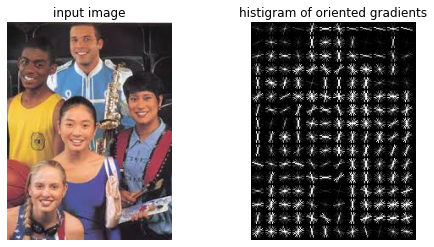

In [ ]:
#read image from drive
image = cv2.imread('grp.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fd, hog_image = hog(image, orientations = 8, pixels_per_cell =(16,16), cells_per_block =(1,1), visualize = True, multichannel = True)

# plot input and hog image
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(8,4), sharex = True, sharey = True)
ax1.axis("off")
ax1.imshow(image, cmap= plt.cm.gray)
ax1.set_title("input image")

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis("off")
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title("histigram of oriented gradients")
plt.show()


found  5 face(s) in input image. 5
A face is located at pixel location Top: 59, Left:108, Bottom:103, Right:151
A face is located at pixel location Top: 26, Left:180, Bottom:69, Right:223
A face is located at pixel location Top: 141, Left:82, Bottom:177, Right:118
A face is located at pixel location Top: 69, Left:6, Bottom:105, Right:42
A face is located at pixel location Top: 7, Left:36, Bottom:50, Right:79


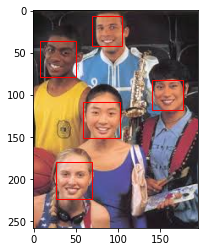

In [ ]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import matplotlib.patches as patch
% matplotlib inline


face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print(f"found  {number_of_faces} face(s) in input image.",format(number_of_faces))
plt.imshow(image)
ax1 =plt.gca()
#repeat for all faces found
for face_location in face_locations:
   #print the location of each face in this image. each face is a list of co-ordinates in (top, right, bottom, left)order.
   top, right,bottom,left = face_location
   x,y,w,h = left,top,right,bottom
   print(f"A face is located at pixel location Top: {x}, Left:{y}, Bottom:{w}, Right:{h}".format(x,y,w,h))

   #lets draw box around a face
   rect =plt.Rectangle((x,y),w-x, h-y, fill=False, color= "red")
   ax1.add_patch(rect)

plt.show()


# Face Recognition

In [ ]:
# Load the known images (create a database)
#sania = face_recognition.load_image_file('sania.jpg')
image= cv2.imread('sania.jpg')
sania = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#shoaib = face_recognition.load_image_file("shoaib.jpg")
image = cv2.imread('shoaib.jpg')
shoaib = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#modi = face_recognition.load_image_file('modi.jpg')
image = cv2.imread('modi.jpg')
modi = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image= cv2.imread('priya.jpg')
priya = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
sania_encoding = face_recognition.face_encodings(sania)[0]
shoaib_encoding = face_recognition.face_encodings(shoaib)[0]
modi_encoding = face_recognition.face_encodings(modi)[0]
priya_encoding = face_recognition.face_encodings(priya)[0]
# create a database for all known face encodings
known_face_encodings= [
                       sania_encoding,
                       shoaib_encoding,
                       modi_encoding,
                       priya_encoding
]

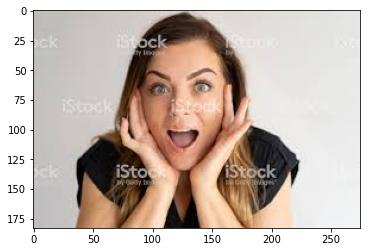

In [ ]:
image = cv2.imread('priya.jpg')
unknown_image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance
for unknown_face_encoding in unknown_face_encodings:
 
  result=[]
  for known_face_encoding in known_face_encodings:
    d= distance.euclidean(known_face_encoding, unknown_face_encodings)
    #print("euclidean distance",d)
    result.append(d)
  threshold = 0.6
  result = np.array(result)<= threshold

  name = "unknown"

  if result[0]:
     name = "sania Mirza"
  elif result[1]:
     name = " shoaib Malik" 
  elif result[2]:
     name = " PM Narendra modi"  
  elif result[3]:
     name = " Priya Rai" 
print(f"found {name} in the photo!")

found  Priya Rai in the photo!


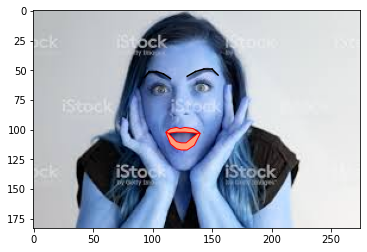

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  #the face landmarks detection model returns these features
  # chin, left eyebrow, right eyebrow, nose bridge, nose tip, left eye, right eye, top lip, bottom lip
  # draw a line over eyebrows

  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x,pre_y = left_eyebrow_pts[0]
  for(x,y) in left_eyebrow_pts[1:]:
    # cv2.line(image,(pre_x,pre_y),(x,y),color,thickness)
    l = mlines.Line2D([pre_x,x],[pre_y,y],color="black")
    ax.add_line(l)
    pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for(x,y) in right_eyebrow_pts[1:]:
    # cv2.line(image,(pre_x,pre_y),(x,y),color,thickness)
    l = mlines.Line2D([pre_x,x],[pre_y,y],color="black") #, fill=(128,0,128,100),width=3)
    ax.add_line(l)
    pre_x,pre_y = x,y

  p= Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='red') #,fill=(128,0,28))
  ax.add_patch(p)
  p= Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='red') #,fill=(128,0,28))
  ax.add_patch(p)
 
#show the final image
plt.show()